In [18]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv('ads_ctr_optimizations.csv')

In [22]:
N: int = 2000 #len(dataset.index)
d: int = len(dataset.columns)

ads_selected: list = []
num_of_selections: list = [0] * d
sums_of_rewards: list = [0] * d
total_reward: int  = 0

for n in range(N):
    ad_idx: int = 0
    max_upper_bound: int = 0
    for idx in range(d):
        if num_of_selections[idx] > 0:
            avg_reward = sums_of_rewards[idx] / num_of_selections[idx]
            delta_i = math.sqrt(3 / 2 * math.log(n + 1) / num_of_selections[idx])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = float('inf')

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad_idx = idx
            
    ads_selected.append(ad_idx)
    num_of_selections[ad_idx] = num_of_selections[ad_idx] + 1
    reward = dataset.values[n, ad_idx]
    sums_of_rewards[ad_idx] = sums_of_rewards[ad_idx] + reward
    total_reward = total_reward + reward

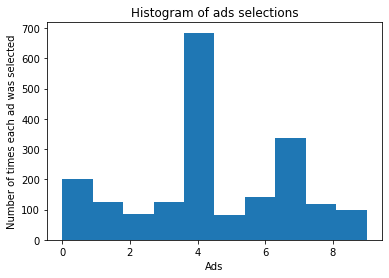

In [23]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()